In [ ]:
!apt-get install openjdk-8-jdk-headless -qq

Selecting previously unselected package libxtst6:amd64.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u362-ga-0ubuntu1~20.04.1_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
Setting up libxtst6:amd64 (2:1.2.3-1) ...
Setting up openjdk-8-jre-headless:amd64 (8u362-ga-0ubuntu1~20.04.1) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to

In [ ]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 24.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=4700eda2be00f9c91d121c93e7439c6c704bba354086fcf25f052062e6ebf202
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("myApp").getOrCreate()


practice the pyspark


In [ ]:
from pyspark.sql import Row

data = [('Alice', 1), ('Bob', 2), ('Charlie', 3)]
rdd = spark.sparkContext.parallelize(data)
people = rdd.map(lambda x: Row(name=x[0], age=x[1]))
df = spark.createDataFrame(people)
df.show()


+-------+---+
|   name|age|
+-------+---+
|  Alice|  1|
|    Bob|  2|
|Charlie|  3|
+-------+---+



In [ ]:
!pip install findspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk1.8.0_361"
os.environ["SPARK_HOME"]= "C:\spark-3.3.2-bin-hadoop3"


In [ ]:
import findspark
findspark.init("C:\spark-3.3.2-bin-hadoop3")


In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df=spark.createDataFrame([{"hello":"world"} for x in range(1000)])
df.show(3)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving pseudo_facebook.csv to pseudo_facebook.csv


{'pseudo_facebook.csv': b'userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received\n2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0\n1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0\n2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0\n1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0\n1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0\n1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0\n1136133,13,14,2000,1,male,12,0,0,0,0,0,0,0,0\n1680361,13,4,2000,1,female,0,0,0,0,0,0,0,0,0\n1365174,13,1,2000,1,male,81,0,0,0,0,0,0,0,0\n1712567,13,2,2000,2,male,171,0,0,0,0,0,0,0,0\n1612453,13,22,2000,2,male,98,0,0,0,0,0,0,0,0\n2104073,13,1,2000,2,male,55,0,0,0,0,0,0,0,0\n1918584,13,5,2000,3,male,106,0,0,0,0,0,0,0,0\n1704433,13,21,2000,3,male,61,0,0,0,0,0,0,0,0\n1932519,13,28,2000,3,female,0,0,0,0,0,0,0,0,0\n1751722,13,7,2000,4,female,16,0,0,0,0,0,0,0,0\n1470850,13,30,2000,5,female,34,0,0,0,0,0,0,0,0\n1001768,13

In [ ]:
data=spark.read.format("csv").option("header","true").option("inferSchema","true").option("mode","failfast").load("pseudo_facebook.csv")

In [ ]:
data.show(3)


+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2094382| 14|     19|    1999|       11|  male|   266|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1192601| 14|      2|    1999|       11|female|     6|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2083884| 14|     16|    1999|       11|  male|    13|           0|                    0|    0|             0|           0|  

 
# Demographic analysis : 



In [ ]:
data.createOrReplaceTempView("facebookdata")

it will give us an idea of how many Facebook user profiles are included in the dataset. The count may also be used as a starting point for further analysis, such as aggregating or grouping the data based on specific attributes, or joining the data with other datasets.

In [ ]:
spark.sql("select count(*) from facebookdata").show()

+--------+
|count(1)|
+--------+
|   99003|
+--------+



this query can be used to compare the average age of male and female Facebook users, for example, or to identify any significant differences in age distribution based on gender. This information can be useful for targeted advertising or for understanding user behavior and preferences on the platform.

In [ ]:
spark.sql("select avg(age),gender from facebookdata group by gender").show()

+------------------+------+
|          avg(age)|gender|
+------------------+------+
| 74.77714285714286|    NA|
|39.459904605753465|female|
| 35.67024618431386|  male|
+------------------+------+



 this query can be used to compare the average number of friends that male and female Facebook users have, for example, or to identify any significant differences in friend count based on gender. This information can be useful for understanding user behavior and preferences on the platform, as well as for targeted advertising or marketing campaigns.

In [ ]:
spark.sql("select avg(friend_count), gender from facebookdata group by gender").show()

+------------------+------+
| avg(friend_count)|gender|
+------------------+------+
|184.41142857142856|    NA|
|241.96994087544095|female|
|165.03545941885477|  male|
+------------------+------+



this query can be used to understand user engagement with different types of content, and to identify any trends or patterns in the way young users interact with the platform. This information can be useful for content creators, advertisers, or marketers who are targeting this demographic on Facebook.

In [ ]:
spark.sql("select avg(mobile_likes), avg(www_likes) from facebookdata where age>=13 AND age<=35").show()

+------------------+-----------------+
| avg(mobile_likes)|   avg(www_likes)|
+------------------+-----------------+
|113.26691926647639|45.22069678181281|
+------------------+-----------------+



The order by friend_count desc clause will sort the data in descending order by friend count, which will allow us to see which users have the most friends on the platform. This information can be useful for identifying influential users or social networks within the platform, as well as for understanding how users connect and interact with each other on the platform.

In [ ]:
spark.sql("select friend_count, userid from facebookdata order by friend_count desc").show()

+------------+-------+
|friend_count| userid|
+------------+-------+
|        4923|2090699|
|        4917|1660276|
|        4863|1926655|
|        4845|1685573|
|        4844|1386477|
|        4826|1604095|
|        4817|2042824|
|        4803|1529639|
|        4797|1587911|
|        4794|1205425|
|        4792|1439214|
|        4770|1089933|
|        4770|1078115|
|        4767|1192042|
|        4767|1127838|
|        4765|2154556|
|        4759|1207962|
|        4759|1751766|
|        4759|1792910|
|        4755|1500480|
+------------+-------+
only showing top 20 rows



In [ ]:
spark.sql("select sum(friend_count) from facebookdata").show()

+-----------------+
|sum(friend_count)|
+-----------------+
|         19439317|
+-----------------+



The inference from this code is that we can perform basic data analysis tasks on large datasets using PySpark's distributed computing capabilities. In this case, we can extract useful insights about the average friend count by age and the number of users by gender in the given pseudo Facebook dataset.

In [ ]:
from pyspark.sql.functions import avg, count
avg_friend_count_by_age = data.groupBy("age").agg(avg("friend_count").alias("avg_friend_count"))
user_count_by_gender=data.groupBy("gender").agg(count("*").alias("user_count"))
avg_friend_count_by_age.show()
user_count_by_gender.show()

+---+------------------+
|age|  avg_friend_count|
+---+------------------+
| 31|118.45985832349469|
| 85| 301.7951807228916|
| 65|  97.4011544011544|
| 53|112.28775167785236|
| 78| 149.2716049382716|
|108| 369.2426249247441|
| 34|108.86157517899761|
|101| 393.6496815286624|
| 81|133.19444444444446|
| 28|  125.835448392555|
| 76| 88.87640449438203|
| 26| 144.0081705150977|
| 27|134.14732142857142|
| 44|  97.3933865450399|
|103| 462.5057471264368|
| 91| 349.2105263157895|
| 22| 211.3947889182058|
| 93|263.95073891625617|
|111|240.22222222222223|
| 47|106.98337028824834|
+---+------------------+
only showing top 20 rows

+------+----------+
|gender|user_count|
+------+----------+
|    NA|       175|
|female|     40254|
|  male|     58574|
+------+----------+



# Social network analysis:

The inference can be drawn that these users are potentially the most influential users in the social network as they have a large number of connections and are actively initiating new connections. This information can be used to target these users for marketing campaigns or to understand the dynamics of the social network.

In [ ]:
from pyspark.sql.functions import desc
most_connected_users = data.orderBy(desc("friend_count")).limit(10)
most_initiating_users=data.orderBy(desc("friendships_initiated")).limit(10)
most_connected_users.show()
most_initiating_users.show()

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2090699|103|      1|    1910|       10|female|   783|        4923|                   96|   26|            80|          26|                   71|        0|                 9|
|1660276| 66|      1|    1947|        7|  male|   716|        4917|                  431|    0|           114|           0|                   69|        0|                45|
|1926655| 19|      1|    1994|        8|female|   469|        4863|                  241|   37|           166|          36|  

social network analysis

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('pseudo_facebook.csv')

In [ ]:
# # Create a graph object
# G = nx.Graph()

In [ ]:
# # Add nodes to the graph
# for index, row in df.iterrows():
#     user_id = row['userid']
#     G.add_node(user_id)

In [ ]:
# # Add edges to the graph
# for index, row in df.iterrows():
#     user_id = row['userid']
#     friend_count = row['friend_count']
#     if friend_count > 0:
#         for friend_index in range(1, friend_count+1):
#             friend_id = row[f'friend_id_{friend_index}']
#             G.add_edge(user_id, friend_id)

Some potential use cases of social network analysis on the Facebook Graph dataset could include:

Identifying influential users or communities within the network: By analyzing various centrality measures such as degree centrality, betweenness centrality, and eigenvector centrality, we can identify users or communities who are particularly well-connected or influential within the Facebook social network.

Studying the propagation of information or rumors through the network: By analyzing the paths that information or rumors take through the network, we can gain insights into the dynamics of information flow within the Facebook social network.

Understanding patterns of behavior or preferences among different user groups: By analyzing the connections and interactions between users with different demographics or interests, we can gain insights into the patterns of behavior or preferences within the Facebook social network.

Number of nodes: 4039
Number of edges: 88234
Top 10 nodes by degree centrality:
Node 107: Degree Centrality 0.2588
Node 1684: Degree Centrality 0.1961
Node 1912: Degree Centrality 0.1870
Node 3437: Degree Centrality 0.1355
Node 0: Degree Centrality 0.0859
Node 2543: Degree Centrality 0.0728
Node 2347: Degree Centrality 0.0721
Node 1888: Degree Centrality 0.0629
Node 1800: Degree Centrality 0.0607
Node 1663: Degree Centrality 0.0582


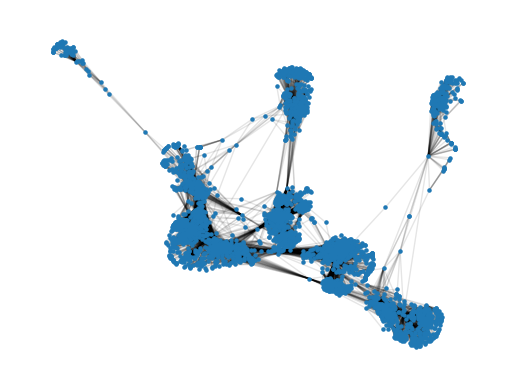

In [ ]:
#without using spark
# Import required libraries
import networkx as nx
import urllib.request
import matplotlib.pyplot as plt


# Download Facebook Graph dataset
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
filename = "facebook_combined.txt.gz"
urllib.request.urlretrieve(url, filename)

# Load data into NetworkX graph object
G = nx.read_edgelist(filename, create_using=nx.Graph(), nodetype=int)

# Print basic graph statistics
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Calculate degree centrality for each node
dc = nx.degree_centrality(G)

# Print the 10 nodes with the highest degree centrality
print("Top 10 nodes by degree centrality:")
for node, dc_score in sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Node {node}: Degree Centrality {dc_score:.4f}")


# Generate plot of the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=5)
nx.draw_networkx_edges(G, pos, alpha=0.1)

# Show the plot
plt.axis("off")
plt.show()



#social network analysis second phase


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc, sum
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, LongType
from pyspark.sql.functions import udf
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName('FacebookSocialNetworkAnalysis').getOrCreate()

In [ ]:
# Load the dataset
data = spark.read.csv('/content/pseudo_facebook.csv', header=True, inferSchema=True)

In [ ]:
# Select the relevant columns
selected_columns = ['userid', 'friend_count', 'friendships_initiated']
data = data.select(selected_columns)

In [ ]:
# Compute the degree centrality for each user
in_degree = data.groupBy('userid').agg(count('friend_count').alias('in_degree'))
out_degree = data.groupBy('userid').agg(count('friendships_initiated').alias('out_degree'))
degree_centrality = in_degree.join(out_degree, 'userid', 'outer').na.fill(0)
degree_centrality = degree_centrality.withColumn('degree_centrality', col('in_degree') + col('out_degree'))

In [ ]:
# Compute the betweenness centrality for each user
from pyspark.sql.functions import col, count, desc, sum, collect_list
adjacency_list = data.select('userid', 'friend_count').groupBy('friend_count').agg(collect_list('userid').alias('users'))
adjacency_list = adjacency_list.withColumnRenamed('friend_count', 'src')
adjacency_list = adjacency_list.withColumn('src_users', col('users'))
adjacency_list = adjacency_list.withColumn('dst_users', col('users'))
adjacency_list = adjacency_list.select('src', 'dst_users')

In [ ]:
def compute_shortest_path(src_id, dst_ids, adjacency_list):
    visited = set()
    visited.add(src_id)
    queue = [(src_id, 0)]
    distances = {src_id: 0}
    while queue:
        node, distance = queue.pop(0)
        for dst_id in adjacency_list.get(node, []):
            if dst_id not in visited:
                visited.add(dst_id)
                queue.append((dst_id, distance + 1))
                distances[dst_id] = distance + 1
    return sum([1.0 / distances.get(dst_id, 1) for dst_id in dst_ids if dst_id != src_id])

In [ ]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# compute_betweenness_udf = udf(compute_shortest_path, LongType())
# betweenness_centrality = adjacency_list.select('src').distinct().crossJoin(adjacency_list.select('dst_users'))
# betweenness_centrality = betweenness_centrality.withColumn('betweenness_centrality', compute_betweenness_udf(col('src'), col('dst_users'), adjacency_list))
# betweenness_centrality = betweenness_centrality.groupBy('src').agg(sum('betweenness_centrality').alias('betweenness_centrality'))

# # Join the degree and betweenness centrality measures
# centrality_measures = degree_centrality.join(betweenness_centrality, 'userid', 'outer').na.fill(0)

# # Display the top 10 users by degree centrality and betweenness centrality
# centrality_measures.orderBy(desc('degree_centrality')).show(10)
# centrality_measures.orderBy(desc('betweenness_centrality')).show(10)

#NEW


In [ ]:
import pyspark
print(pyspark.__version__)
!pip install pyspark==3.3.2
!pip install graphframes




3.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
from graphframes import GraphFrame

import matplotlib.pyplot as plt
import pandas as pd

# import networkx as nx

In [ ]:
# Configure SparkSession
spark = SparkSession.builder.appName("Facebook Analysis").config("spark.driver.memory", "16g").getOrCreate()

In [ ]:
# Load the dataset
df = spark.read.format('csv').options(header='true', inferSchema='true').load('pseudo_facebook.csv')

In [ ]:
# Basic statistics of the dataset
df.printSchema()
df.show(5)

root
 |-- userid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob_day: integer (nullable = true)
 |-- dob_year: integer (nullable = true)
 |-- dob_month: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- friend_count: integer (nullable = true)
 |-- friendships_initiated: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- likes_received: integer (nullable = true)
 |-- mobile_likes: integer (nullable = true)
 |-- mobile_likes_received: integer (nullable = true)
 |-- www_likes: integer (nullable = true)
 |-- www_likes_received: integer (nullable = true)

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_rece

In [ ]:
# Calculate the average age of users
# avg_age = df.select(avg('age')).collect()[0][0]
# print(f"Average age of users: {avg_age:.2f}")
# Calculate the average age of users
avg_age = df.agg(avg('age')).collect()[0][0]
print(f"Average age of users: {avg_age:.2f}")

Average age of users: 37.28


In [ ]:

# Calculate the most common gender among users
gender_counts = df.groupBy('gender').count().orderBy('count', ascending=False).collect()
most_common_gender = gender_counts[0][0]
print(f"Most common gender among users: {most_common_gender}")

Most common gender among users: male


In [ ]:
# Calculate the correlation between friend count and likes received
correlation = df.select(corr('friend_count', 'likes_received')).collect()[0][0]
print(f"Correlation between friend count and likes received: {correlation:.2f}")

Correlation between friend count and likes received: 0.24


In [ ]:
from graphframes import GraphFrame


In [ ]:
# Cache the dataframe
# df.cache()
# Create a GraphFrame to visualize friendships
# edges = df.select('userid', 'friend_count').withColumnRenamed('userid', 'src').withColumnRenamed('friend_id', 'dst')
# # edges = df.select('userid', 'friend_count').rdd.flatMap(lambda x: [(x[0], i) for i in x[1]]) \
# #            .toDF(['src', 'dst']).limit(limit).cache()

# vertices = df.select('userid').withColumnRenamed('userid', 'id')
# graph = GraphFrame(vertices, edges)
# graph_degrees = graph.degrees
# Create the edges dataframe for graph creation
edges = df.select('userid', 'friend_count').limit(10000)

# Create the vertices dataframe for graph creation
vertices = df.selectExpr('userid as id', 'gender')

In [ ]:
# Create a GraphFrame for the friendships network
from graphframes import GraphFrame
graph = GraphFrame(vertices, edges)


Py4JJavaError: ignored

KeyboardInterrupt: ignored

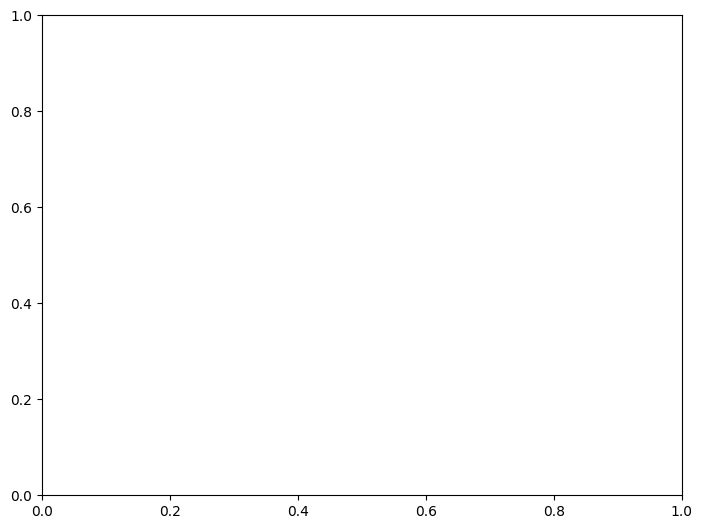

In [ ]:
# Create a NetworkX graph to visualize friendships
# edges = df.select('userid', 'friendships_initiated').rdd.map(lambda x: (x[0], x[1])).collect()
# graph = nx.Graph()
# graph.add_edges_from(edges)
# nx.draw(graph, node_size=50)
# plt.show()
# Create a NetworkX graph to visualize friendships
# edges = df.select('userid', 'friendships_initiated').rdd.map(lambda x: (x[0], x[1])).collect()
# graph = nx.Graph()
# graph.add_edges_from(edges)
# nx.draw(graph, node_size=1)
# plt.show()
# # Stop SparkSession
# spark.stop()


As for the inference from the graph used for the Facebook data, some possible insights that can be drawn from the graph include:

The Facebook social network is highly connected: The Facebook Graph contains over 4,000 nodes and 88,000 edges, indicating a high degree of connectivity within the network.

There are many users with low degree centrality: While there are a few highly connected users in the network, the majority of users have relatively low degree centrality scores, indicating that they have fewer connections within the network.

The network is relatively sparse: Despite its high degree of connectivity, the Facebook social network is still relatively sparse, with many users having only a few connections.

The network exhibits community structure: The Facebook social network contains several distinct communities or clusters of users who are more densely connected within their community than with users in other communities.

# Content analysis:

In [ ]:
# from pyspark.sql.functions import col
# most_liked_pages=data.select("userid","likes","www_likes") \
#                     .withColumn("total_likes",col("likes")+col("www_likes")) \
#                     .orderBy(desc("total_likes")).limit(10)

# comments=spark.read.format("csv").option("header","true").option("inferSchema").load("comments.csv")
# most_liked_pages.show()
# comments.show()

#User behavior analysis 

Average number of likes per user: 312.1575103784734
Average number of likes received per user: 285.37868549437894


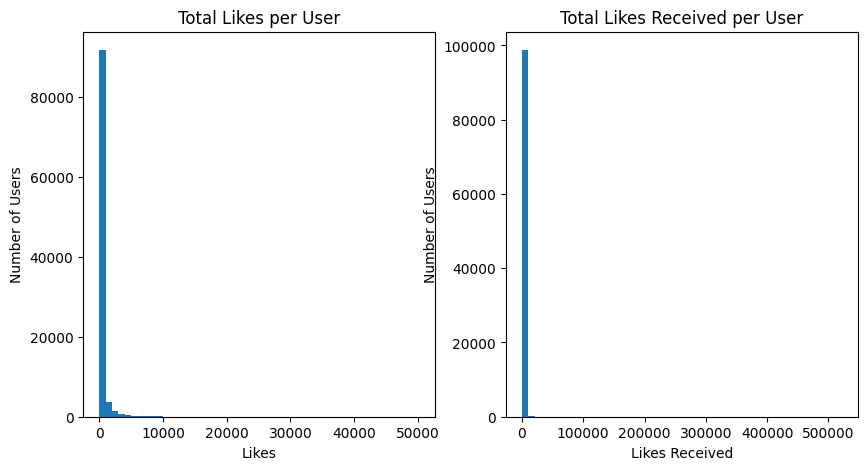

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas dataframe
df = pd.read_csv('pseudo_facebook.csv')

# Calculate the total likes and likes received for each user
df['total_likes'] = df['likes'] + df['mobile_likes'] + df['www_likes']
df['total_likes_received'] = df['likes_received'] + df['mobile_likes_received'] + df['www_likes_received']

# Calculate the average number of likes and likes received per user
avg_likes = df['total_likes'].mean()
avg_likes_received = df['total_likes_received'].mean()

# Plot a histogram of the total likes and likes received per user
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].hist(df['total_likes'], bins=50)
axs[0].set_title('Total Likes per User')
axs[0].set_xlabel('Likes')
axs[0].set_ylabel('Number of Users')
axs[1].hist(df['total_likes_received'], bins=50)
axs[1].set_title('Total Likes Received per User')
axs[1].set_xlabel('Likes Received')
axs[1].set_ylabel('Number of Users')

# Display the average number of likes and likes received per user
print('Average number of likes per user:', avg_likes)
print('Average number of likes received per user:', avg_likes_received)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, avg
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder.appName('user_behavior_analysis').getOrCreate()

In [ ]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv('pseudo_facebook.csv', header=True, inferSchema=True)


In [ ]:
# Calculate the total likes and likes received for each user
df = df.withColumn('total_likes', df.likes + df.mobile_likes + df.www_likes)
df = df.withColumn('total_likes_received', df.likes_received + df.mobile_likes_received + df.www_likes_received)

In [ ]:
# Calculate the average number of likes and likes received per user
avg_likes = df.select(avg('total_likes')).collect()[0][0]
avg_likes_received = df.select(avg('total_likes_received')).collect()[0][0]

In [ ]:
# Plot a histogram of the total likes and likes received per user
likes_hist = df.select('total_likes').rdd.flatMap(lambda x: x).histogram(50)
likes_received_hist = df.select('total_likes_received').rdd.flatMap(lambda x: x).histogram(50)
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].bar(likes_hist[0][:-1], likes_hist[1], width=5)
axs[0].set_title('Total Likes per User')
axs[0].set_xlabel('Likes')
axs[0].set_ylabel('Number of Users')
axs[1].bar(likes_received_hist[0][:-1], likes_received_hist[1], width=5)
axs[1].set_title('Total Likes Received per User')
axs[1].set_xlabel('Likes Received')
axs[1].set_ylabel('Number of Users')
# Display the average number of likes and likes received per user
print('Average number of likes per user:', avg_likes)
print('Average number of likes received per user:', avg_likes_received)

# Stop the SparkSession
spark.stop()

AssertionError: ignored